# Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/sample_data/PCOS_data_simple.csv')
df.shape

(541, 45)

In [ ]:
df.drop(columns=['Sl. No', 'Patient File No.', 'Unnamed: 44'],inplace=True)
# prompt: apply kNN imputation to fill the null values of the column Marriage Status (Yrs), and Fast food (Y/N)

import pandas as pd
from sklearn.impute import KNNImputer

# Assuming df is your DataFrame and it has columns 'Marriage Status (Yrs)' and 'Fast food (Y/N)'
# with missing values.

# Select the columns with missing values that you want to impute
columns_to_impute = ['Marraige Status (Yrs)', 'Fast food (Y/N)']
df_to_impute = df[columns_to_impute].copy()

# Create a KNN imputer
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

# Fit and transform the imputer on your selected columns
df_imputed = pd.DataFrame(imputer.fit_transform(df_to_impute), columns=columns_to_impute)

# Replace the original columns with the imputed values in your main DataFrame
df[columns_to_impute] = df_imputed

# Now, df should have the missing values in 'Marriage Status (Yrs)' and 'Fast food (Y/N)' filled using kNN imputation.
# Replacing '.' with empty string in the 'II    beta-HCG(mIU/mL)' column
df['II    beta-HCG(mIU/mL)'] = df['II    beta-HCG(mIU/mL)'].str.replace('.', '', regex=False).astype(float)
# Replacing any non-digit characters with empty string before converting to float
df['AMH(ng/mL)'] = pd.to_numeric(df['AMH(ng/mL)'].str.replace('[^0-9.]', '', regex=True), errors='coerce')
df['AMH(ng/mL)'] = df['AMH(ng/mL)'].fillna(df['AMH(ng/mL)'].median())


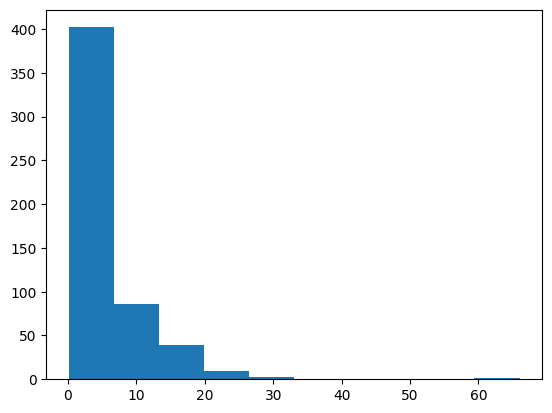

In [ ]:
plt.hist(df['AMH(ng/mL)'])
plt.show()

In [ ]:
df.dtypes

,0
PCOS (Y/N),int64
Age (yrs),int64
Weight (Kg),float64
Height(Cm),float64
BMI,float64
Blood Group,int64
Pulse rate(bpm),int64
RR (breaths/min),int64
Hb(g/dl),float64
Cycle(R/I),int64


In [ ]:
df['PCOS (Y/N)'].value_counts()

,count
PCOS (Y/N),
0,364
1,177


In [ ]:
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = df.drop('PCOS (Y/N)', axis=1)
y = df['PCOS (Y/N)']

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['PCOS (Y/N)'] = y_resampled

# Check the class distribution after SMOTE
print(df_resampled['PCOS (Y/N)'].value_counts())

# Now df_resampled contains the data with balanced class distribution
# You can use df_resampled for further analysis or model training


PCOS (Y/N)
0    364
1    364
Name: count, dtype: int64


In [ ]:
df_resampled.shape

(728, 42)

In [ ]:
df = df_resampled.copy()

# Causal ML

In [ ]:
df.head()

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),PCOS (Y/N)
0,28,44.6,152.0,19.3,15,78,22,10.48,2,5,...,1.0,0,110,80,3,3,18.0,18.0,8.5,0
1,36,65.0,161.5,24.9,15,74,20,11.70,2,5,...,0.0,0,120,70,3,5,15.0,14.0,3.7,0
2,33,68.8,165.0,25.3,11,72,18,11.80,2,5,...,1.0,0,120,80,13,15,18.0,20.0,10.0,1
3,37,65.0,148.0,29.7,13,72,20,12.00,2,5,...,0.0,0,120,70,2,2,15.0,14.0,7.5,0
4,25,52.0,161.0,20.1,11,72,18,10.00,2,5,...,0.0,0,120,80,3,4,16.0,14.0,7.0,0


In [ ]:
!pip install dowhy
from dowhy import CausalModel




In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
df.columns

Index([' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Blood Group',
       'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)',
       'Cycle length(days)', 'Marraige Status (Yrs)', 'Pregnant(Y/N)',
       'No. of abortions', '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)',
       'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
       'Endometrium (mm)', 'PCOS (Y/N)'],
      dtype='object')

In [ ]:
X = df.drop(columns=['Waist:Hip Ratio','PCOS (Y/N)'])
y = df['Waist:Hip Ratio']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=123)

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances_sorted = feature_importances.sort_values(ascending=False)
display(feature_importances_sorted.head(8))

,0
Hip(inch),0.401091
Waist(inch),0.323110
Avg. F size (L) (mm),0.054699
PRG(ng/mL),0.020342
Vit D3 (ng/mL),0.014141
II beta-HCG(mIU/mL),0.012030
TSH (mIU/L),0.011188
AMH(ng/mL),0.010589


In [ ]:
# Define causal model
model = CausalModel(
    data=df,  # Full dataset
    treatment="Endometrium (mm)",  # The feature whose causal effect you want to measure
    outcome="PCOS (Y/N)",  # The target variable
    common_causes=['Marraige Status (Yrs)', 'AMH(ng/mL)', 'Vit D3 (ng/mL)','Avg. F size (L) (mm)',' Age (yrs)']  # The identified confounders
)

# Identify the causal effect
identified_estimand = model.identify_effect()

# Estimate the causal effect using linear regression
effect = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")

# Print causal effect
print(effect)


*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                                                                         ↪
───────────────────(E[PCOS (Y/N)|AMH(ng/mL), Age (yrs),Vit D3 (ng/mL),Marraige Status (Yrs),Avg. F ↪
d[Endometrium (mm)]                                                                                ↪

↪                 
↪  size (L) (mm)])
↪                 
Estimand assumption 1, Unconfoundedness: If U→{Endometrium (mm)} and U→PCOS (Y/N) then P(PCOS (Y/N)|Endometrium (mm),AMH(ng/mL), Age (yrs),Vit D3 (ng/mL),Marraige Status (Yrs),Avg. F size (L) (mm),U) = P(PCOS (Y/N)|Endometrium (mm),AMH(ng/mL), Age (yrs),Vit D3 (ng/mL),Marraige Status (Yrs),Avg. F size (L) (mm))

## Realized estimand
b: PCOS (Y/N)~Endometrium (mm)+AMH(ng/mL)+ Age (yrs)+Vit D3 (ng/mL)+Marraige Status (Yrs)+Avg. F size (L) (mm)
Target units: ate

## Estimate
Mean 

/usr/local/lib/python3.11/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


# Hybrid Net

In [ ]:
df.head()

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),PCOS (Y/N)
0,28,44.6,152.0,19.3,15,78,22,10.48,2,5,...,1.0,0,110,80,3,3,18.0,18.0,8.5,0
1,36,65.0,161.5,24.9,15,74,20,11.70,2,5,...,0.0,0,120,70,3,5,15.0,14.0,3.7,0
2,33,68.8,165.0,25.3,11,72,18,11.80,2,5,...,1.0,0,120,80,13,15,18.0,20.0,10.0,1
3,37,65.0,148.0,29.7,13,72,20,12.00,2,5,...,0.0,0,120,70,2,2,15.0,14.0,7.5,0
4,25,52.0,161.0,20.1,11,72,18,10.00,2,5,...,0.0,0,120,80,3,4,16.0,14.0,7.0,0


In [ ]:
df.columns


Index([' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Blood Group',
       'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)',
       'Cycle length(days)', 'Marraige Status (Yrs)', 'Pregnant(Y/N)',
       'No. of abortions', '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)',
       'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
       'Endometrium (mm)', 'PCOS (Y/N)'],
      dtype='object')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
cols_to_keep = ['AMH(ng/mL)','Pulse rate(bpm) ', ' Age (yrs)', 'BMI', 'RR (breaths/min)', 'Cycle(R/I)', 'Pregnant(Y/N)','Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)',
                'Reg.Exercise(Y/N)', 'PCOS (Y/N)', 'Cycle length(days)', 'No. of abortions', 'Follicle No. (L)', 'Follicle No. (R)', 'Waist:Hip Ratio', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)','Endometrium (mm)']
new_df = df[cols_to_keep]


In [ ]:
new_df.to_csv('PCOS Preprocessed 2.csv',index=False)

In [ ]:

new_df['Avg_Follicle_No'] = new_df['Follicle No. (L)'] + new_df['Follicle No. (R)']
new_df['Avg_Follicle_Size'] = new_df['Avg. F size (L) (mm)'] + new_df['Avg. F size (R) (mm)']
new_df.drop(columns=['Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)'],axis=1,inplace=True)

In [ ]:
new_df.head()

,AMH(ng/mL),Pulse rate(bpm),Age (yrs),BMI,RR (breaths/min),Cycle(R/I),Pregnant(Y/N),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),...,Reg.Exercise(Y/N),PCOS (Y/N),Cycle length(days),No. of abortions,Follicle No. (L),Follicle No. (R),Waist:Hip Ratio,Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,2.07,78,28,19.3,22,2,0,0,0,0,...,0,0,5,0,3,3,0.83,18.0,18.0,8.5
1,1.53,74,36,24.9,20,2,1,0,0,0,...,0,0,5,0,3,5,0.84,15.0,14.0,3.7
2,6.63,72,33,25.3,18,2,1,0,0,0,...,0,1,5,0,13,15,0.90,18.0,20.0,10.0
3,1.22,72,37,29.7,20,2,0,0,0,0,...,0,0,5,0,2,2,0.86,15.0,14.0,7.5
4,2.26,72,25,20.1,18,2,1,0,0,0,...,0,0,5,0,3,4,0.81,16.0,14.0,7.0


In [ ]:
X = new_df.drop('PCOS (Y/N)',axis=1)
y = new_df['PCOS (Y/N)']
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=43)




In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import KFold
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.models import Sequential

In [ ]:


# Load dataset
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

# Prepare base models
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
lgb_model = lgb.LGBMClassifier(verbose=-1)

# Train XGBoost and LightGBM
xgb_model.fit(X_train, y_train)
lgb_model.fit(X_train, y_train)

# Get base model predictions
xgb_train_pred = xgb_model.predict_proba(X_train)[:, 1]  # Probability of class 1
lgb_train_pred = lgb_model.predict_proba(X_train)[:, 1]

xgb_test_pred = xgb_model.predict_proba(X_test)[:, 1]
lgb_test_pred = lgb_model.predict_proba(X_test)[:, 1]

# Stack predictions as new training data for the meta-learner
stacked_train = np.column_stack((xgb_train_pred, lgb_train_pred))
stacked_test = np.column_stack((xgb_test_pred, lgb_test_pred))

# Simplified Keras Meta-Learner Model
meta_model = Sequential([
    layers.Dense(16, activation='relu', input_shape=(2,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification output
])

meta_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(lambda epoch, lr: lr * 0.9 if epoch > 10 else lr)

# Train meta-learner with validation split
meta_model.fit(stacked_train, y_train, epochs=100, batch_size=16, verbose=1, validation_split=0.2,
               callbacks=[early_stopping, lr_scheduler])

# Make final predictions
final_preds = (meta_model.predict(stacked_test) > 0.5).astype(int)

# Evaluate
accuracy = accuracy_score(y_test, final_preds)
print(f"Stacked Ensemble Accuracy: {accuracy:.4f}")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:09:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8328 - loss: 0.6034 - val_accuracy: 0.9636 - val_loss: 0.5477 - learning_rate: 0.0010
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9601 - loss: 0.5358 - val_accuracy: 1.0000 - val_loss: 0.4851 - learning_rate: 0.0010
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9838 - loss: 0.4709 - val_accuracy: 1.0000 - val_loss: 0.4230 - learning_rate: 0.0010
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.3999 - val_accuracy: 1.0000 - val_loss: 0.3654 - learning_rate: 0.0010
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.3635 - val_accuracy: 1.0000 - val_loss: 0.3147 - learning_rate: 0.0010
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.3377 - val_accuracy: 1.0000 - val_loss: 0.2701 - learning_rate: 0.0010
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.2658 - val_accuracy: 1.00

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Stacked Ensemble Accuracy: 0.8681


Epoch 1/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0549
Epoch 2/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0471
Epoch 3/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0436
Epoch 4/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0404
Epoch 5/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0350
Epoch 6/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0336
Epoch 7/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0302
Epoch 8/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0276
Epoch 9/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0237
Epoch 10/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0234
Epoch 11/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0211
Epoch 12/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [ ]:
# Evaluate
accuracy = classification_report(y_test, final_preds)
print(f"Stacked Ensemble Report: {accuracy}")

Stacked Ensemble Report:               precision    recall  f1-score   support

           0       0.89      0.84      0.86        91
           1       0.85      0.90      0.87        91

    accuracy                           0.87       182
   macro avg       0.87      0.87      0.87       182
weighted avg       0.87      0.87      0.87       182



6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


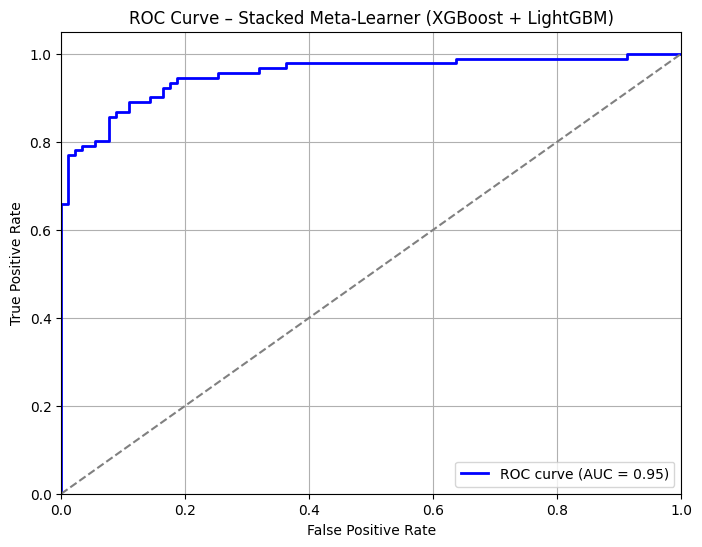

ROC-AUC Score: 0.9535


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities from the meta-learner on the test set
y_pred_proba = meta_model.predict(stacked_test).ravel()  # Flatten to 1D array

# Compute ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Stacked Meta-Learner (XGBoost + LightGBM)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"ROC-AUC Score: {roc_auc:.4f}")


In [ ]:
# Make final predictions
final_preds = (meta_model.predict(stacked_train) > 0.5).astype(int)
accuracy = classification_report(y_train, final_preds)
print(f"Stacked Ensemble Report: {accuracy}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Stacked Ensemble Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       273
           1       1.00      1.00      1.00       273

    accuracy                           1.00       546
   macro avg       1.00      1.00      1.00       546
weighted avg       1.00      1.00      1.00       546

